In [1]:
# Testing your installation
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np


print('TensorFlow: ', tf.__version__)
print("numpy :" , np.__version__)

TensorFlow:  2.15.0
numpy : 1.25.2


In [2]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("pima_indians_diabetes.csv")

In [4]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.columns = ['No of times pregnant' , 'Plasma glucose concentration' ,'Diastolic blood pressure (mm Hg)' , 'Triceps skin fold thickness (mm)'
, '2-Hour serum insulin (mu U/ml)' , 'Body mass index ' , 'Diabetes pedigree function' , 'Age' ,'Class variable' ]

In [6]:
df.head()

,No of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class variable
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
df.isnull().sum()#there is no null values

No of times pregnant                0
Plasma glucose concentration        0
Diastolic blood pressure (mm Hg)    0
Triceps skin fold thickness (mm)    0
2-Hour serum insulin (mu U/ml)      0
Body mass index                     0
Diabetes pedigree function          0
Age                                 0
Class variable                      0
dtype: int64

In [8]:
df.value_counts().sum()#no categoricl data

767

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = x = df.drop('Class variable', axis=1)
y = df['Class variable']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (613, 8)
x_test shape:  (154, 8)
y_train shape:  (613,)
y_test shape:  (154,)


In [12]:
x.head()

,No of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

x_train = np.array(x_train)
x_test = np.array(x_test)

In [14]:
# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras.layers import Dense , Flatten
model.add(Dense(8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=40,
                    validation_data=(x_test, y_test),

                    validation_split = 0.1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
20/20 [==============================] - 3s 43ms/step - loss: 0.6912 - accuracy: 0.6427 - val_loss: 0.6728 - val_accuracy: 0.6753
Epoch 2/40
20/20 [==============================] - 0s 10ms/step - loss: 0.6819 - accuracy: 0.6509 - val_loss: 0.6654 - val_accuracy: 0.6623
Epoch 3/40
20/20 [==============================] - 0s 14ms/step - loss: 0.6719 - accuracy: 0.6525 - val_loss: 0.6579 - val_accuracy: 0.6623
Epoch 4/40
20/20 [==============================] - 0s 23ms/step - loss: 0.6624 - accuracy: 0.6574 - val_loss: 0.6482 - val_accuracy: 0.6883
Epoch 5/40
20/20 [==============================] - 0s 17ms/step - loss: 0.6527 - accuracy: 0.6737 - val_loss: 0.6399 - val_accuracy: 0.6948
Epoch 6/40
20/20 [==============================] - 0s 12ms/step - loss: 0.6446 - accuracy: 0.6786 - val_loss: 0.6316 - val_accuracy: 0.7013
Epoch 7/40
20/20 [==============================] - 0s 13ms/step - loss: 0.6363 - accuracy: 0.6868 - val_loss: 0.6234 - val_accuracy: 0.7143
Epoch 8/40
20

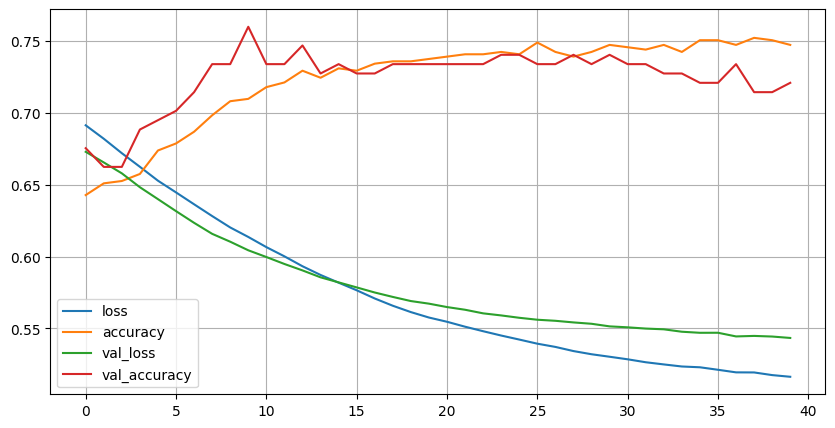

In [15]:
learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [16]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 9ms/step - loss: 0.5434 - accuracy: 0.7208


[0.543420672416687, 0.7207792401313782]

In [17]:
y_pred = np.round(model.predict(x_test))


5/5 [==============================] - 0s 7ms/step


In [18]:
print(y_pred.shape)
print(y_test.shape)
y_test = np.array(y_test).reshape(-1,1)
print(y_test.shape)



(154, 1)
(154,)
(154, 1)


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)



array([[81, 16],
       [27, 30]])

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        97
           1       0.65      0.53      0.58        57

    accuracy                           0.72       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.71      0.72      0.71       154



In [21]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X data type: ', X_train.dtype)
print('y_train shape: ', y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
X data type:  uint8
y_train shape:  (60000,)


In [22]:
X_train[1].shape

(28, 28)

In [23]:
X_train[1][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

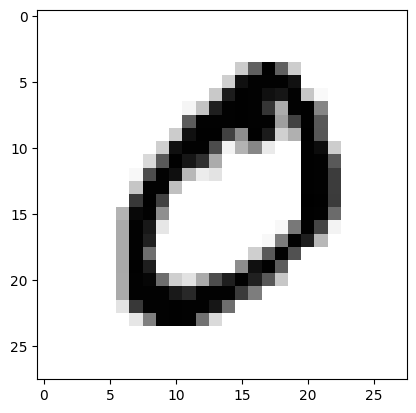

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [24]:
np.set_printoptions(linewidth=200)
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show()
print(X_train[1])

In [25]:
X_train = X_train/255

In [26]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

In [27]:
class_name = np.array(["zero", "one", "two",
                       "three", "four", "five", "six",
                       "seven", "eight", "nine"])

In [28]:
y_train[1], class_name[y_train[1]]

(0, 'zero')

In [29]:
X_train[0].shape

(28, 28)

In [30]:
# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras import layers

model.add(layers.Flatten(input_shape=X_train[0].shape, name='input'))
model.add(layers.Dense(400, activation='relu', name='hidden_1'))
# model.add(layers.Dense(300, activation='relu', name='hidden_2'))
model.add(layers.Dense(200, activation='relu', name='hidden_2'))
model.add(layers.Dense(10, activation='softmax', name='output'))

In [31]:
model.summary()
#in first hidden layer there is 400 bias
#in second hidden layer there is 200 bias

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 400)               314000    
                                                                 
 hidden_2 (Dense)            (None, 200)               80200     
                                                                 
 output (Dense)              (None, 10)                2010      
                                                                 
Total params: 396210 (1.51 MB)
Trainable params: 396210 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.layers

In [33]:
hidden_1 = model.layers[1]
h1_weights, h1_bias = hidden_1.get_weights()
print(h1_weights.shape)
print(h1_bias.shape)

(784, 400)
(400,)


In [34]:
h1_weights[0]

array([-0.02953757, -0.04875362,  0.03623898,  0.03938828,  0.04576871,  0.02703501,  0.01483598, -0.01590174,  0.06907698,  0.01965377, -0.00477396,  0.07103748, -0.00920674,  0.05511778,
        0.06580331,  0.03674941,  0.02269998, -0.03593282, -0.03403451, -0.04310066, -0.00279067,  0.02713393,  0.02973607, -0.06894468, -0.06172768, -0.03195367,  0.00172051, -0.01728009,
       -0.00338196,  0.03629357,  0.04737518,  0.00386506, -0.06919831, -0.01809208, -0.03834252,  0.03355881,  0.0665238 ,  0.03150669,  0.06243987, -0.05289853,  0.06200821, -0.02247201,
        0.03908599,  0.04081954,  0.03725184,  0.05514652,  0.0205102 , -0.04275884,  0.01297817, -0.03868221, -0.00225981,  0.0710474 ,  0.06595493,  0.03918379,  0.0033126 , -0.0629507 ,
        0.04950021, -0.03510245,  0.03321758, -0.03203473,  0.05334788,  0.02127542, -0.04148246,  0.04774053, -0.0277158 , -0.01398744, -0.06801735, -0.04836168, -0.01847306,  0.05211265,
       -0.00113054,  0.05488262, -0.05387505, -0.065969

In [35]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])

In [36]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=40,
                    validation_split=5/60,
                    callbacks=[checkpoint_cb, early_stopping_cb]) # batch_size =

Epoch 1/40
1719/1719 [==============================] - 18s 9ms/step - loss: 0.5980 - accuracy: 0.8457 - val_loss: 0.2500 - val_accuracy: 0.9306
Epoch 2/40
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2847 - accuracy: 0.9177 - val_loss: 0.1989 - val_accuracy: 0.9454
Epoch 3/40
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2335 - accuracy: 0.9337 - val_loss: 0.1702 - val_accuracy: 0.9532
Epoch 4/40
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1999 - accuracy: 0.9422 - val_loss: 0.1500 - val_accuracy: 0.9590
Epoch 5/40
1719/1719 [==============================] - 18s 11ms/step - loss: 0.1735 - accuracy: 0.9499 - val_loss: 0.1385 - val_accuracy: 0.9620
Epoch 6/40
1719/1719 [==============================] - 21s 12ms/step - loss: 0.1532 - accuracy: 0.9562 - val_loss: 0.1224 - val_accuracy: 0.9676
Epoch 7/40
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1364 - accuracy: 0.9606 - val_loss: 0.1117 - val_

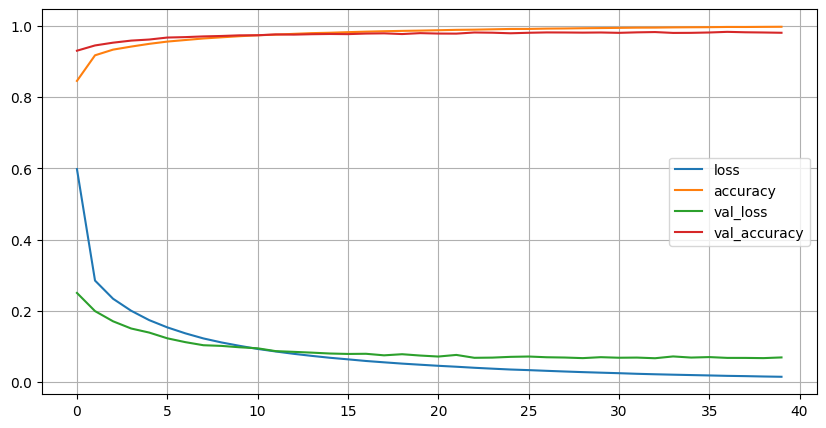

In [37]:
learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [38]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0637 - accuracy: 0.9812


[0.06366299092769623, 0.9811999797821045]

In [40]:
X_new = X_test[5].reshape(1, 28, 28)  # Reshape to (1, 28, 28) if single grayscale image
y_pred = model.predict(X_new)
print(y_pred)


1/1 [==============================] - 0s 147ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [41]:
print(X_test[5])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  77 254 107   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19 227 254 254   9   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  81 254 254 165   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 203 254 254  73   

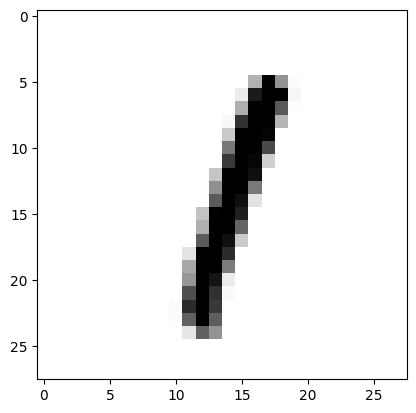

In [42]:
plt.imshow(X_test[5], cmap=plt.cm.binary)
plt.show()

In [43]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('actual values', y_test[5])
print('predicted values', y_pred)
class_name[y_pred[:]]


1/1 [==============================] - 0s 21ms/step
actual values 1
predicted values [1]


array(['one'], dtype='<U5')

In [44]:
# With CNN

In [45]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

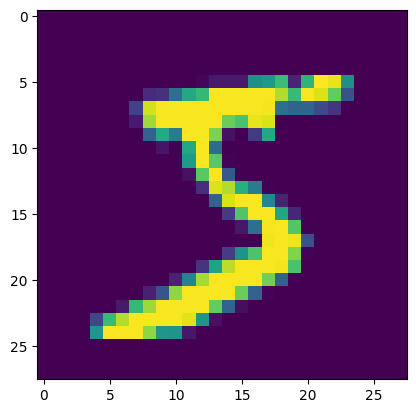

In [46]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [47]:
#check image shape
X_train[0].shape

(28, 28)

In [48]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X data type: ', X_train.dtype)
print('y_train shape: ', y_train.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
X data type:  uint8
y_train shape:  (60000,)


In [49]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [50]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical
#create model
model = Sequential()
#add model layers
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(15, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [53]:
#compile model using accuracy to measure model performance
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
1875/1875 [==============================] - 30s 15ms/step - loss: 0.6724 - accuracy: 0.8263 - val_loss: 0.2491 - val_accuracy: 0.9235
Epoch 2/4
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2687 - accuracy: 0.9176 - val_loss: 0.2077 - val_accuracy: 0.9335
Epoch 3/4
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2410 - accuracy: 0.9274 - val_loss: 0.2248 - val_accuracy: 0.9343
Epoch 4/4
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2261 - accuracy: 0.9318 - val_loss: 0.2312 - val_accuracy: 0.9324


In [55]:
#predict first 4 images in the test set
model.predict(X_test[:4])


1/1 [==============================] - 0s 77ms/step


array([[1.2587454e-09, 9.4858045e-11, 6.5589182e-07, 1.9120936e-05, 2.6447274e-13, 1.3434757e-07, 2.0560290e-14, 9.9997938e-01, 5.1255063e-07, 2.2258844e-07],
       [1.9718287e-07, 1.3422938e-07, 9.9963427e-01, 3.6248245e-04, 7.6431243e-11, 1.5490050e-08, 1.9919971e-06, 2.5183806e-09, 8.4575942e-07, 1.5723886e-10],
       [6.3337659e-04, 9.8545164e-01, 2.0663901e-03, 3.8951563e-03, 8.5831340e-04, 6.0042599e-05, 1.5531461e-04, 7.1788055e-04, 5.9962636e-03, 1.6570170e-04],
       [9.9870729e-01, 1.9196538e-08, 2.9675341e-05, 1.3591979e-04, 2.4001094e-08, 7.5353816e-04, 4.8119531e-05, 2.9601626e-05, 1.5371252e-04, 1.4208780e-04]], dtype=float32)

In [56]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2312 - accuracy: 0.9324


[0.23119387030601501, 0.9323999881744385]

In [58]:
#working on cifar10 data set
#first by dense method

In [59]:
from keras.datasets import mnist ,cifar10
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [60]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X data type: ', X_train.dtype)
print('y_train shape: ', y_train.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
X data type:  uint8
y_train shape:  (50000, 1)


In [61]:
X_train[1].shape

(32, 32, 3)

In [62]:
X_train[1][0].shape

(32, 3)

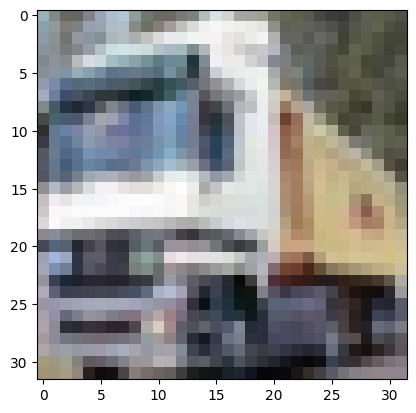

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


In [63]:
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show()
print(X_train[1])

In [64]:
X_train = X_train/255

In [65]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [66]:
class_name = np.array(["airplane", "automobile", "bird",
                       "cat", "deer", "dog", "frog",
                       "horse", "ship", "truck"])

In [67]:
y_train[1], class_name[y_train[1]]

(array([9], dtype=uint8), array(['truck'], dtype='<U10'))

In [68]:
# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras import layers

model.add(layers.Flatten(input_shape=X_train[0].shape, name='input'))
model.add(layers.Dense(2000, activation='relu', name='hidden_1'))
model.add(layers.Dense(1000, activation='relu', name='hidden_2'))
model.add(layers.Dense(800, activation='relu', name='hidden_3'))
model.add(layers.Dense(500, activation='relu', name='hidden_4'))
model.add(layers.Dense(10, activation='softmax', name='output'))

In [69]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 3072)              0         
                                                                 
 hidden_1 (Dense)            (None, 2000)              6146000   
                                                                 
 hidden_2 (Dense)            (None, 1000)              2001000   
                                                                 
 hidden_3 (Dense)            (None, 800)               800800    
                                                                 
 hidden_4 (Dense)            (None, 500)               400500    
                                                                 
 output (Dense)              (None, 10)                5010      
                                                                 
Total params: 9353310 (35.68 MB)
Trainable params: 935

In [70]:
model.layers

In [71]:
hidden_1 = model.layers[1]
h1_weights, h1_bias = hidden_1.get_weights()
print(h1_weights.shape)
print(h1_bias.shape)

(3072, 2000)
(2000,)


In [72]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])

In [73]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=40,
                    validation_split=5/60,
                    callbacks=[checkpoint_cb, early_stopping_cb]) # batch_size =

Epoch 1/40
1433/1433 [==============================] - 106s 73ms/step - loss: 1.8468 - accuracy: 0.3382 - val_loss: 1.7906 - val_accuracy: 0.3509
Epoch 2/40
1433/1433 [==============================] - 101s 71ms/step - loss: 1.6435 - accuracy: 0.4149 - val_loss: 1.6778 - val_accuracy: 0.3996
Epoch 3/40
1433/1433 [==============================] - 106s 74ms/step - loss: 1.5588 - accuracy: 0.4436 - val_loss: 1.5686 - val_accuracy: 0.4464
Epoch 4/40
1433/1433 [==============================] - 101s 71ms/step - loss: 1.4895 - accuracy: 0.4705 - val_loss: 1.5744 - val_accuracy: 0.4461
Epoch 5/40
1433/1433 [==============================] - 101s 71ms/step - loss: 1.4399 - accuracy: 0.4863 - val_loss: 1.9068 - val_accuracy: 0.3523
Epoch 6/40
1433/1433 [==============================] - 104s 72ms/step - loss: 1.3913 - accuracy: 0.5040 - val_loss: 1.5083 - val_accuracy: 0.4567
Epoch 7/40
1433/1433 [==============================] - 103s 72ms/step - loss: 1.3515 - accuracy: 0.5205 - val_loss: 1

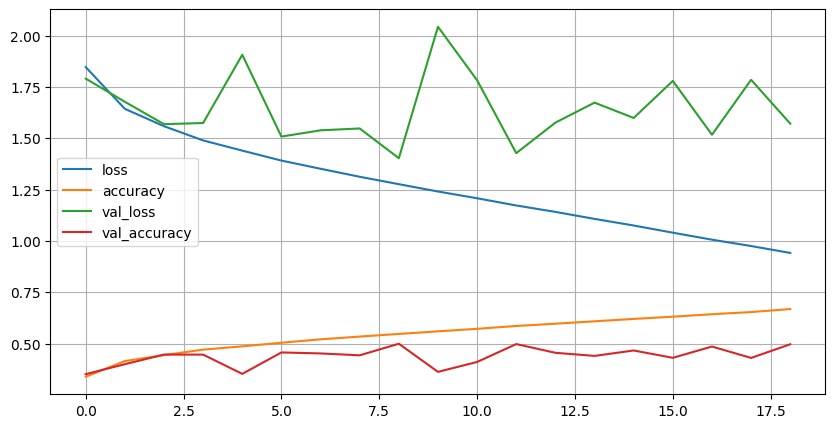

In [74]:
learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [75]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 7s 24ms/step - loss: 1.3893 - accuracy: 0.5078


[1.3893091678619385, 0.5077999830245972]

In [82]:
X_new = X_test[5].reshape(1, 32, 32, 3)  # Reshape to (1, 32, 32, 3) for single image prediction
y_pred = model.predict(X_new)
print(y_pred)


1/1 [==============================] - 0s 294ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 8.383907e-19 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


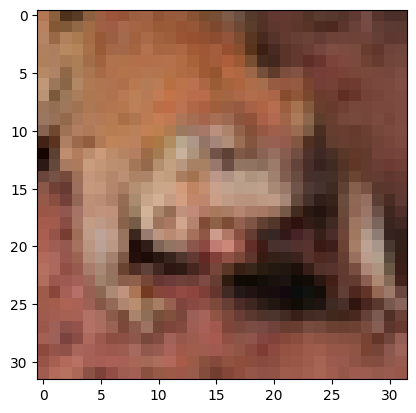

In [83]:
plt.imshow(X_test[5], cmap=plt.cm.binary)
plt.show()

In [84]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('actual values', y_test[5])
print('predicted values', y_pred)
class_name[y_pred[:]]


1/1 [==============================] - 0s 24ms/step
actual values [6]
predicted values [3]


array(['cat'], dtype='<U10')

In [85]:
# With CNN

In [86]:
from keras.datasets import cifar10
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X data type: ', X_train.dtype)
print('y_train shape: ', y_train.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
X data type:  uint8
y_train shape:  (50000, 1)


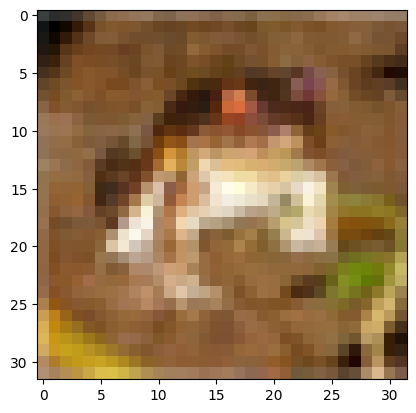

In [87]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [88]:
#check image shape
X_train[0].shape

(32, 32, 3)

In [89]:
#reshape data to fit model
X_train = X_train.reshape(50000,32,32,3)
X_test = X_test.reshape(10000,32,32,3)

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [91]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical
#create model
model = Sequential()
#add model layers
model.add(Conv2D(20, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(15, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(layers.Dense(2000, activation='relu', name='hidden_1'))
model.add(layers.Dense(1000, activation='relu', name='hidden_2'))
model.add(layers.Dense(800, activation='relu', name='hidden_3'))
model.add(layers.Dense(500, activation='relu', name='hidden_4'))
model.add(Dense(10, activation='softmax'))

In [92]:
#compile model using accuracy to measure model performance
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_split=5/60,
                    callbacks=[checkpoint_cb, early_stopping_cb]) # batch_size =

Epoch 1/20
1433/1433 [==============================] - 92s 62ms/step - loss: 1.9982 - accuracy: 0.2630 - val_loss: 1.7365 - val_accuracy: 0.3561
Epoch 2/20
1433/1433 [==============================] - 86s 60ms/step - loss: 1.6507 - accuracy: 0.3997 - val_loss: 1.6907 - val_accuracy: 0.3816
Epoch 3/20
1433/1433 [==============================] - 87s 60ms/step - loss: 1.5209 - accuracy: 0.4524 - val_loss: 1.6844 - val_accuracy: 0.4003
Epoch 4/20
1433/1433 [==============================] - 86s 60ms/step - loss: 1.4431 - accuracy: 0.4825 - val_loss: 1.4335 - val_accuracy: 0.4771
Epoch 5/20
1433/1433 [==============================] - 86s 60ms/step - loss: 1.3823 - accuracy: 0.5046 - val_loss: 1.4401 - val_accuracy: 0.4706
Epoch 6/20
1433/1433 [==============================] - 85s 59ms/step - loss: 1.3269 - accuracy: 0.5253 - val_loss: 2.1376 - val_accuracy: 0.3425
Epoch 7/20
1433/1433 [==============================] - 89s 62ms/step - loss: 1.2785 - accuracy: 0.5418 - val_loss: 1.3163 -

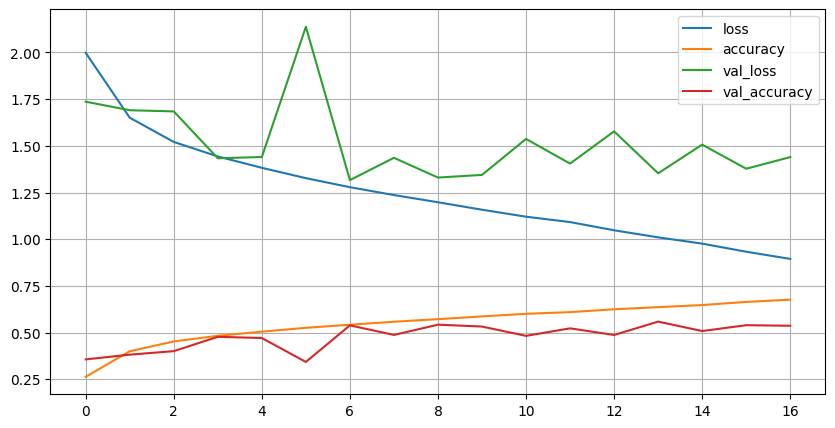

In [94]:
learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [95]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.3412 - accuracy: 0.5183


[1.3412190675735474, 0.5182999968528748]